In [1]:
# 필요한 패키지 설치

import pandas as pd 
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("datasets/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# 컬럼 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# 명목형 변수 더미처리

# 하나의 가변수 범주 제거 옵션 적용
df2 = pd.get_dummies(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=True
                    )

df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [5]:
# RobustScaler 적용

# 숫자형 변수 분리
df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

# 숫자형 변수 RobustScaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

# 컬럼명 결합
df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)

# 숫자형 테이블과 더미화 문자형 테이블 결합
df3 = pd.concat([df_num2,df_nom],axis=1)

df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,-0.947226,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.102842,10.0,10.0,0.5,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,-0.423545,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.491204,14.0,0.0,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [6]:
# 독립변수와 종속변수 분리하여 생성
X = df3.drop(['HeartDisease_Yes'],axis=1)
y = df3[['HeartDisease_Yes']]

# 학습셋과 테스트셋 분리하여 생성(7.5:2.5)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  239846
test data 개수:  79949


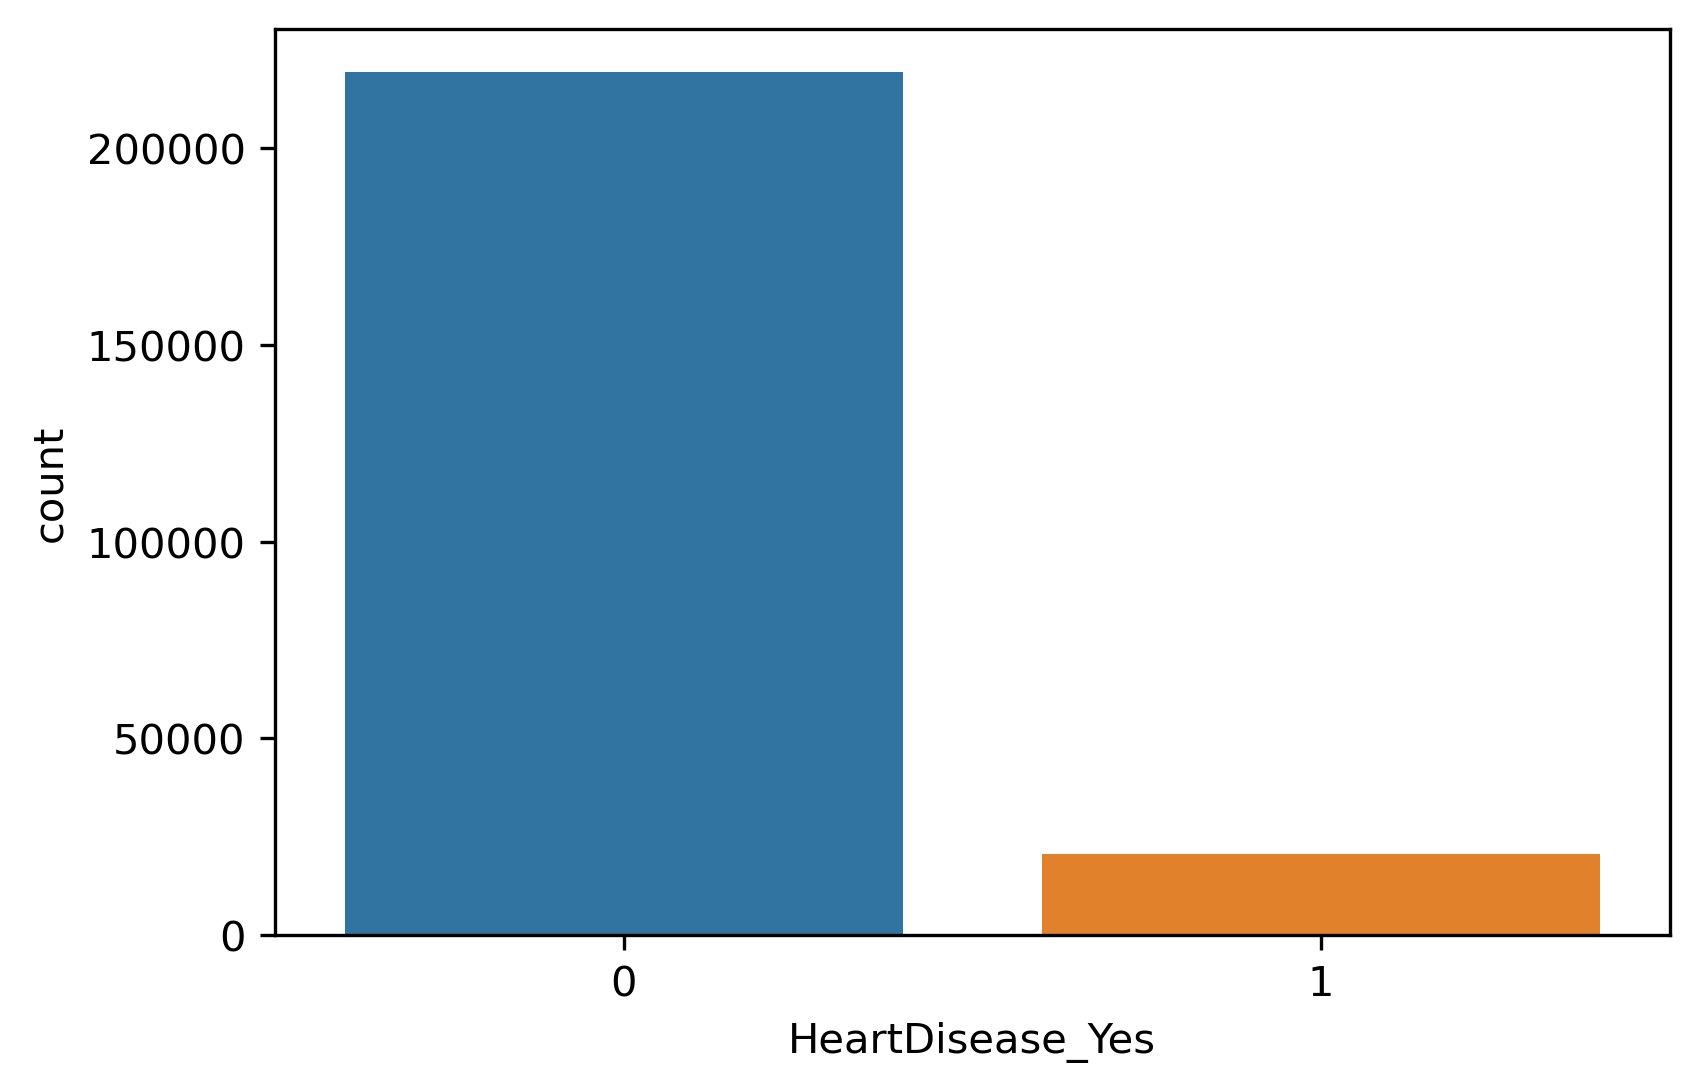

In [7]:
# HeartDisease_Yes 컬럼 클래스 분포 시각화
sns.countplot(x="HeartDisease_Yes", data=y_train)

plt.show()

In [17]:
# 임시 변수명 적용

X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']


X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
163572,-0.202977,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
150901,1.476319,0.0,0.0,0.5,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
164527,-0.248985,15.0,10.0,-2.0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
260971,0.805142,0.0,0.0,0.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
262287,0.612991,5.0,0.0,0.0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0


In [9]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train_re,y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train_re.shape, y_train_re.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train_re['y1']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['y1']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (239846, 37) (239846, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (41036, 37) (41036, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 0    219328
1     20518
Name: y1, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 1    20518
0    20518
Name: y1, dtype: int64


In [10]:
# 컬럼명 복구
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-0.572395,0.0,1.666667,0.5,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,2.365359,6.0,0.333333,-0.5,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,-0.964817,0.0,2.666667,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,-1.246279,0.0,0.000000,-0.5,1,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0.668471,15.0,0.000000,0.5,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


In [11]:
# 학습셋 모델 학습

model = LogisticRegression()
model.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도:', model.score(X_train_under, y_train_under))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


학습셋 모델 정확도: 0.7645725704259675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# 테스트셋 모델 적합

print('테스트셋 모델 정확도:', model.score(X_test, y_test))

테스트셋 모델 정확도: 0.7501532226794582


In [13]:
# 계수값 확인

print(model.coef_)

[[ 7.94849270e-02  1.19088541e-02  2.93860460e-02 -5.45000754e-02
   4.06112134e-01 -2.46744807e-01  1.28152611e+00  2.00070634e-01
   7.60268121e-01 -5.74375739e-02  3.97070744e-01  4.15952140e-01
   7.88601253e-01  1.07642238e+00  1.52874797e+00  1.76634364e+00
   2.04612912e+00  2.33265548e+00  2.68501408e+00  2.84155732e+00
   3.20283092e+00 -5.28873063e-01 -2.43639982e-01 -1.83580485e-01
  -9.67382420e-02 -6.00065344e-02  2.81263387e-01  4.80312738e-01
   4.37448259e-01 -2.02598119e-03  1.49954560e+00  1.02784311e+00
   1.81095933e+00  4.45426020e-01  2.94367112e-01  6.17215689e-01
   1.41569511e-01]]


In [14]:
# 다른 로지스틱 모델로 학습

model2 = sm.Logit(y_train_under, X_train_under)
results = model2.fit(method = "newton") 

results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       HeartDisease_Yes   No. Observations:                41036
Model:                          Logit   Df Residuals:                    40999
Method:                           MLE   Df Model:                           36
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                     inf
Time:                        21:24:44   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BMI                                  0.0918      0.015      6.056      0.000       0.062       0.121
PhysicalHealth                       0.0114      0.003      3.367      0.001       0.005       0.018
MentalHealth                         0.0170      0.005      3.478      0.001       0.007       0.027
SleepTime                           -0.0733      0.016     -4.619      0.000      -0.104      -0.042
Smoking_Yes                          0.3696      0.025     14.807      0.000       0.321       0.419
AlcoholDrinking_Yes                 -0.2732      0.053     -5.107      0.000      -0.378      -0.168
Stroke_Yes                           1.2616      0.054     23.555      0.000       1.157       1.367
DiffWalking_Yes                      0.1708      0.035      4.907      0.000       0.103       0.239
Sex_Male                             0.6680      0.025     26.580      0.000       0.619       0.717
AgeCategory_25-29                   -1.4044      0.127    -11.088      0.000      -1.653      -1.156
AgeCategory_30-34                   -0.9200      0.103     -8.905      0.000      -1.122      -0.717
AgeCategory_35-39                   -0.9326      0.097     -9.634      0.000      -1.122      -0.743
AgeCategory_40-44                   -0.5486      0.089     -6.190      0.000      -0.722      -0.375
AgeCategory_45-49                   -0.2661      0.082     -3.244      0.001      -0.427      -0.105
AgeCategory_50-54                    0.1993      0.076      2.636      0.008       0.051       0.348
AgeCategory_55-59                    0.4354      0.072      6.049      0.000       0.294       0.576
AgeCategory_60-64                    0.7295      0.070     10.414      0.000       0.592       0.867
AgeCategory_65-69                    1.0211      0.070     14.680      0.000       0.885       1.157
AgeCategory_70-74                    1.3695      0.070     19.549      0.000       1.232       1.507
AgeCategory_75-79                    1.5302      0.073     20.958      0.000       1.387       1.673
AgeCategory_80 or older              1.8668      0.072     25.936      0.000       1.726       2.008
Race_Asian                          -2.6688      0.120    -22.307      0.000      -2.903      -2.434
Race_Black                          -2.3371      0.081    -28.721      0.000      -2.497      -2.178
Race_Hispanic                       -2.3334      0.080    -29.136      0.000      -2.490      -2.176
Race_Other                          -2.2070      0.093    -23.681      0.000      -2.390      -2.024
Race_White                          -2.1554      0.069    -31.379      0.000      -2.290      -2.021
Diabetic_No, borderline diabetes     0.2903      0.078      3.734      0.000       0.138       0.443
Diabetic_Yes                         0.4801      0.032     14.907      0.000       0.417       0.543
Diabetic_Yes (during pregnancy)      0.2256      0.164      1.376      0.169      -0.096       0.547
PhysicalA

In [15]:
# 오즈비 확인

np.exp(results.params)

BMI                                 1.096091
PhysicalHealth                      1.011469
MentalHealth                        1.017101
SleepTime                           0.929300
Smoking_Yes                         1.447148
AlcoholDrinking_Yes                 0.760970
Stroke_Yes                          3.530911
DiffWalking_Yes                     1.186292
Sex_Male                            1.950422
AgeCategory_25-29                   0.245524
AgeCategory_30-34                   0.398530
AgeCategory_35-39                   0.393534
AgeCategory_40-44                   0.577770
AgeCategory_45-49                   0.766331
AgeCategory_50-54                   1.220555
AgeCategory_55-59                   1.545532
AgeCategory_60-64                   2.074125
AgeCategory_65-69                   2.776307
AgeCategory_70-74                   3.933446
AgeCategory_75-79                   4.619038
AgeCategory_80 or older             6.467417
Race_Asian                          0.069335
Race_Black